In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mtdnetwork.network as network
import mtdnetwork.hacker as hacker

from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.osshuffle import OSShuffle
from mtdnetwork.mtd.serviceshuffle import ServiceShuffle
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle

import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

subnets per layer: 
[1, 1, 6, 6, 6]
nodes per layer: 
[50, 21, 44, 42, 43]
Nodes per subnet: 
[[50], [21], [8, 10, 7, 6, 9, 4], [7, 5, 9, 8, 8, 5], [6, 6, 8, 8, 8, 7]]


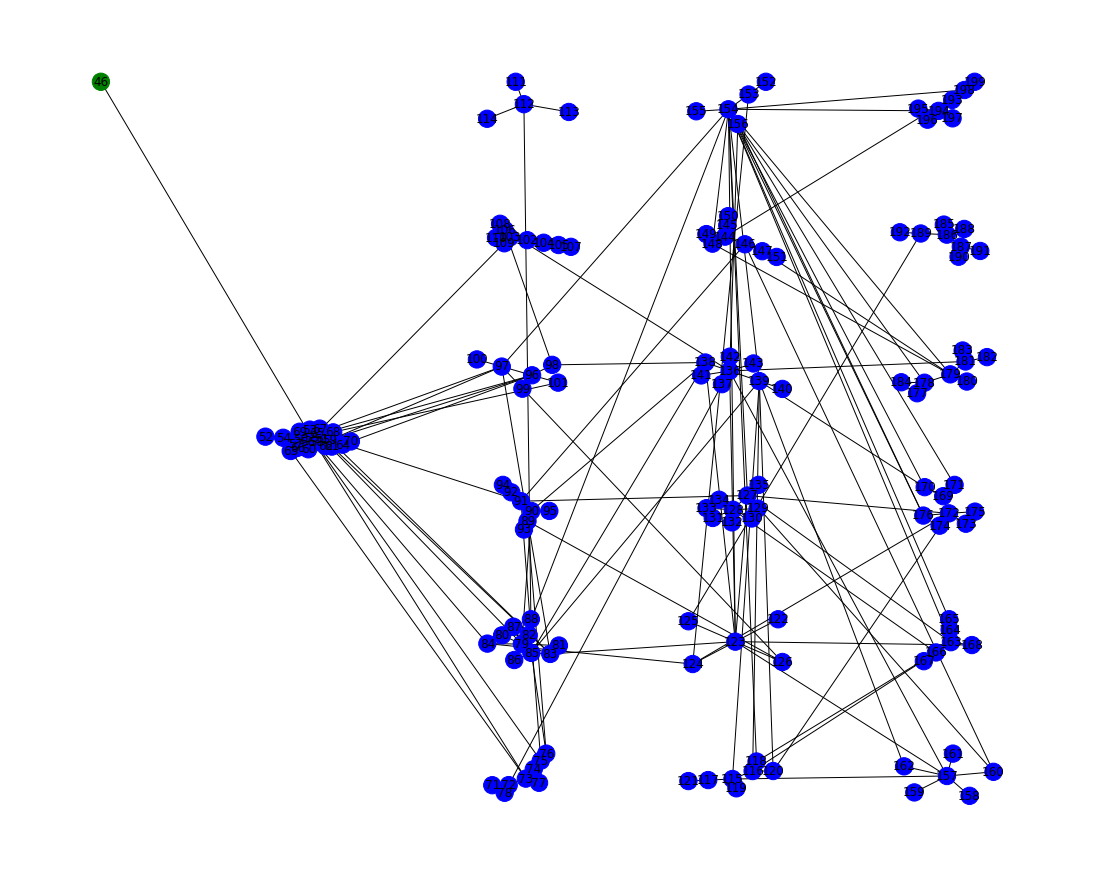

In [28]:
#Note, limited to 5 subnets per layer
test_network = network.Network(200, 50, 20, 5)
# test_network.register_mtd(PortShuffle)
# test_network.register_mtd(IPShuffle)
# test_network.register_mtd(OSShuffle)
# test_network.register_mtd(ServiceShuffle)
# test_network.register_mtd(UserShuffle)
# test_network.register_mtd(HostTopologyShuffle)
# test_network.register_mtd(CompleteTopologyShuffle)
test_network.draw()

In [ ]:
test_network.gen_graph()

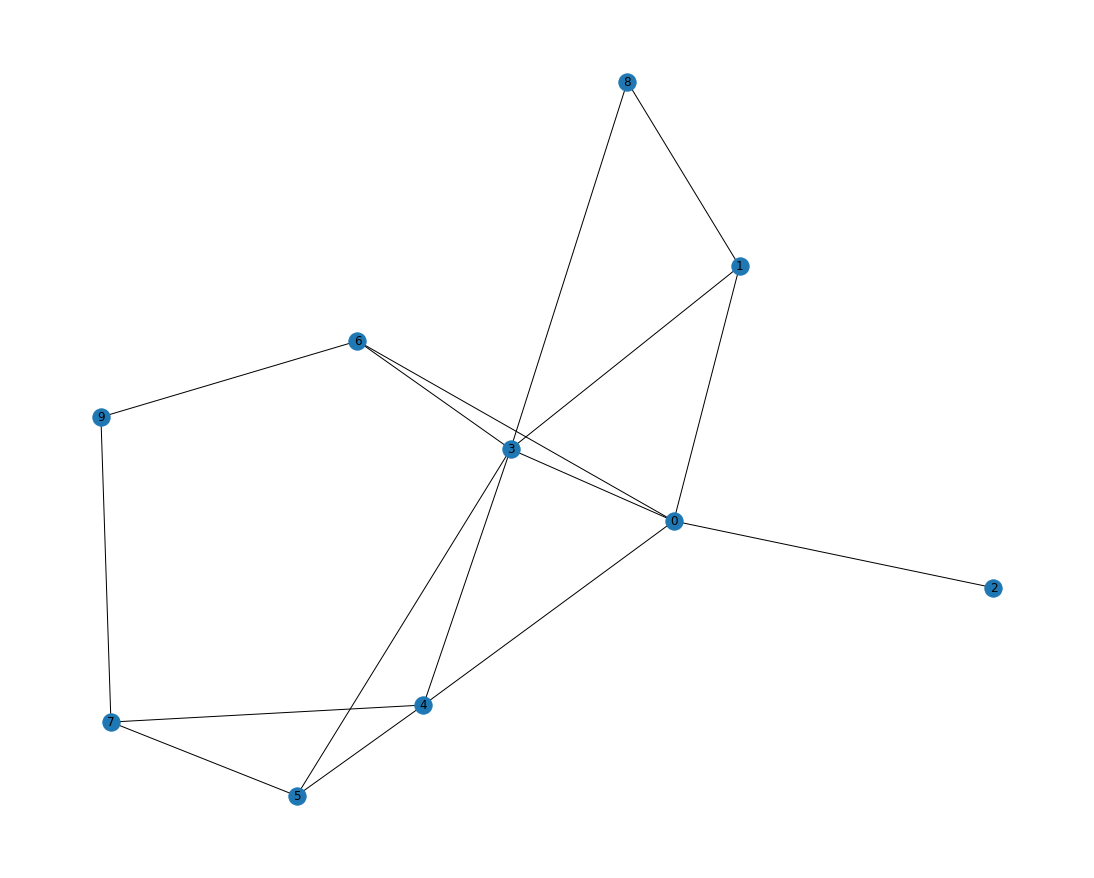

In [47]:
import mtdnetwork.targetnetwork as targetnetwork
alt_network = targetnetwork.Network(30, 5, 5, 3)
alt_network.draw()

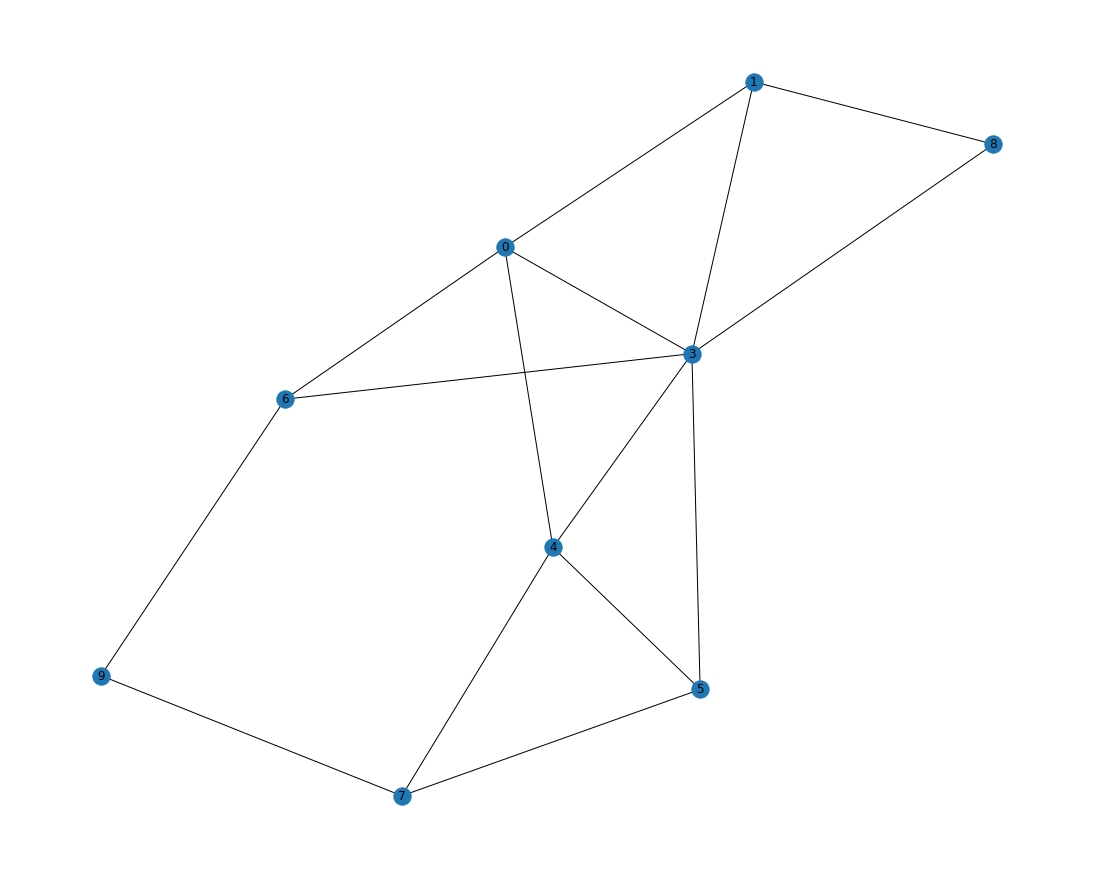

In [49]:
alt_network.remove_node(2)
alt_network.draw()

In [4]:
import mtdnetwork.scorer as scorer
stats = scorer.Statistics("CompromiseStatistics")
stats.get_dict()



{'record name': 'CompromiseStatistics',
 'x': [],
 'y': [],
 'cumulative y': [],
 'total events': 0}

In [5]:
test_network.get_statistics()

{'Total Initial Vulnerabilities': 142,
 'Initial Vulns Per OS': {'centos': {'7': 10, '8': 2, '6': 14, '4': 9},
  'windows': {'8': 8, '7': 18, '8.1': 9},
  'ubuntu': {'18.04': 7, '12.04': 31, '16.04': 7, '14.04': 11},
  'freebsd': {'12': 11, '13': 2, '11': 1, '10': 2}},
 'Average Initial RoA Per OS': {'centos': {'7': 0.10065016592715012,
   '8': 0.003969923604376875,
   '6': 0.03911342751607429,
   '4': 0.03987000026142887},
  'windows': {'8': 0.04726944318091244,
   '7': 0.07031270813391752,
   '8.1': 0.13655224276027852},
  'ubuntu': {'18.04': 0.0671746952559165,
   '12.04': 0.038897763605082805,
   '16.04': 0.09673014468595399,
   '14.04': 0.0189341537552777},
  'freebsd': {'12': 0.01763253802284901,
   '13': 0.03971601706246546,
   '11': 0.003158223730376188,
   '10': 0.025114856989115624}},
 'OS Types In Initial Network': {'centos 7': 4,
  'windows 10': 3,
  'windows 8': 2,
  'ubuntu 18.04': 4,
  'freebsd 12': 5,
  'windows 7': 3,
  'windows 8.1': 3,
  'ubuntu 12.04': 4,
  'ubuntu 

In [6]:
adversary = hacker.Hacker(test_network)

In [7]:
curr_time = 0
time_step = 1
for curr_time in range(200000):
    adversary.step(curr_time)
    if adversary.done:
        break
print("DONE")
print("TIME:", curr_time)

INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:centos:7
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:PASSWORD SPRAY USER COMPROMISE:7:windows:10
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:5:ubuntu:18.04
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:SCANNI

DONE
TIME: 199999


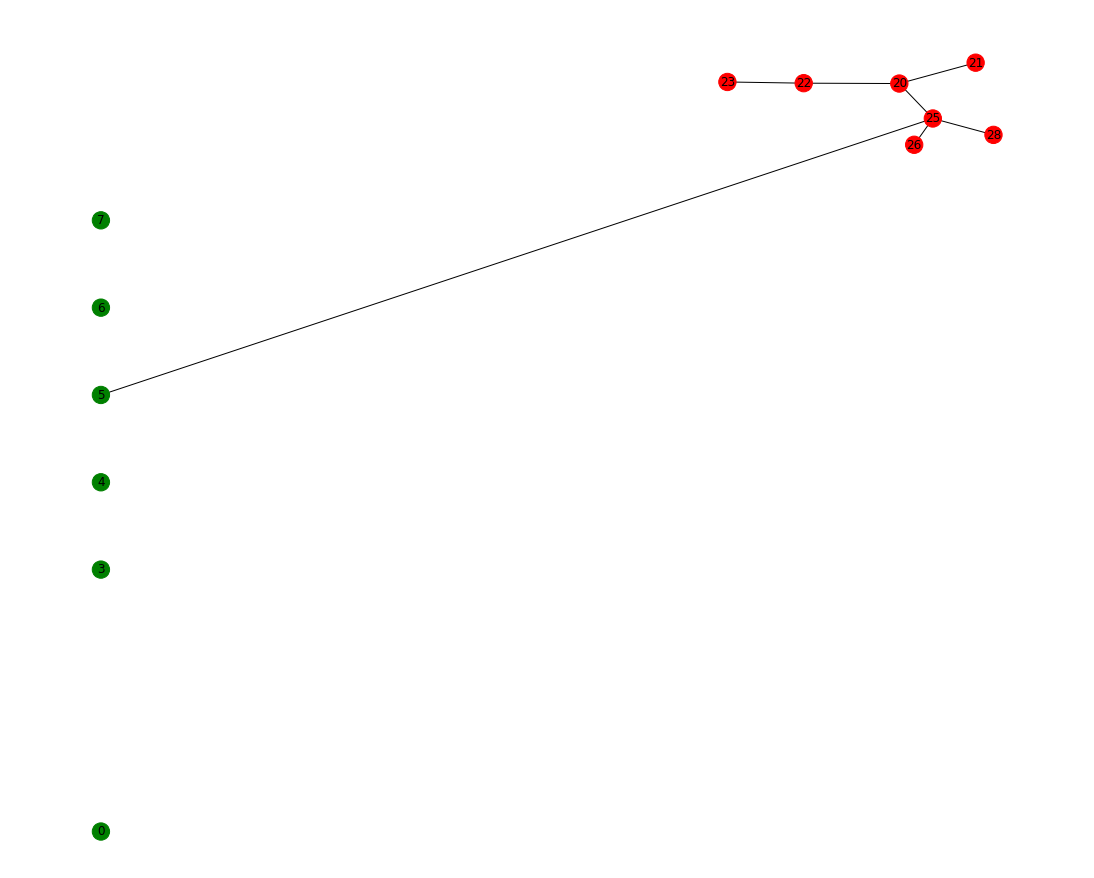

In [8]:
test_network.draw_compromised(adversary.compromised_hosts)

In [9]:
test_network.get_statistics()

{'Total Initial Vulnerabilities': 142,
 'Initial Vulns Per OS': {'centos': {'7': 10, '8': 2, '6': 14, '4': 9},
  'windows': {'8': 8, '7': 18, '8.1': 9},
  'ubuntu': {'18.04': 7, '12.04': 31, '16.04': 7, '14.04': 11},
  'freebsd': {'12': 11, '13': 2, '11': 1, '10': 2}},
 'Average Initial RoA Per OS': {'centos': {'7': 0.10065016592715012,
   '8': 0.003969923604376875,
   '6': 0.03911342751607429,
   '4': 0.03987000026142887},
  'windows': {'8': 0.04726944318091244,
   '7': 0.07031270813391752,
   '8.1': 0.13655224276027852},
  'ubuntu': {'18.04': 0.0671746952559165,
   '12.04': 0.038897763605082805,
   '16.04': 0.09673014468595399,
   '14.04': 0.0189341537552777},
  'freebsd': {'12': 0.01763253802284901,
   '13': 0.03971601706246546,
   '11': 0.003158223730376188,
   '10': 0.025114856989115624}},
 'OS Types In Initial Network': {'centos 7': 4,
  'windows 10': 3,
  'windows 8': 2,
  'ubuntu 18.04': 4,
  'freebsd 12': 5,
  'windows 7': 3,
  'windows 8.1': 3,
  'ubuntu 12.04': 4,
  'ubuntu 

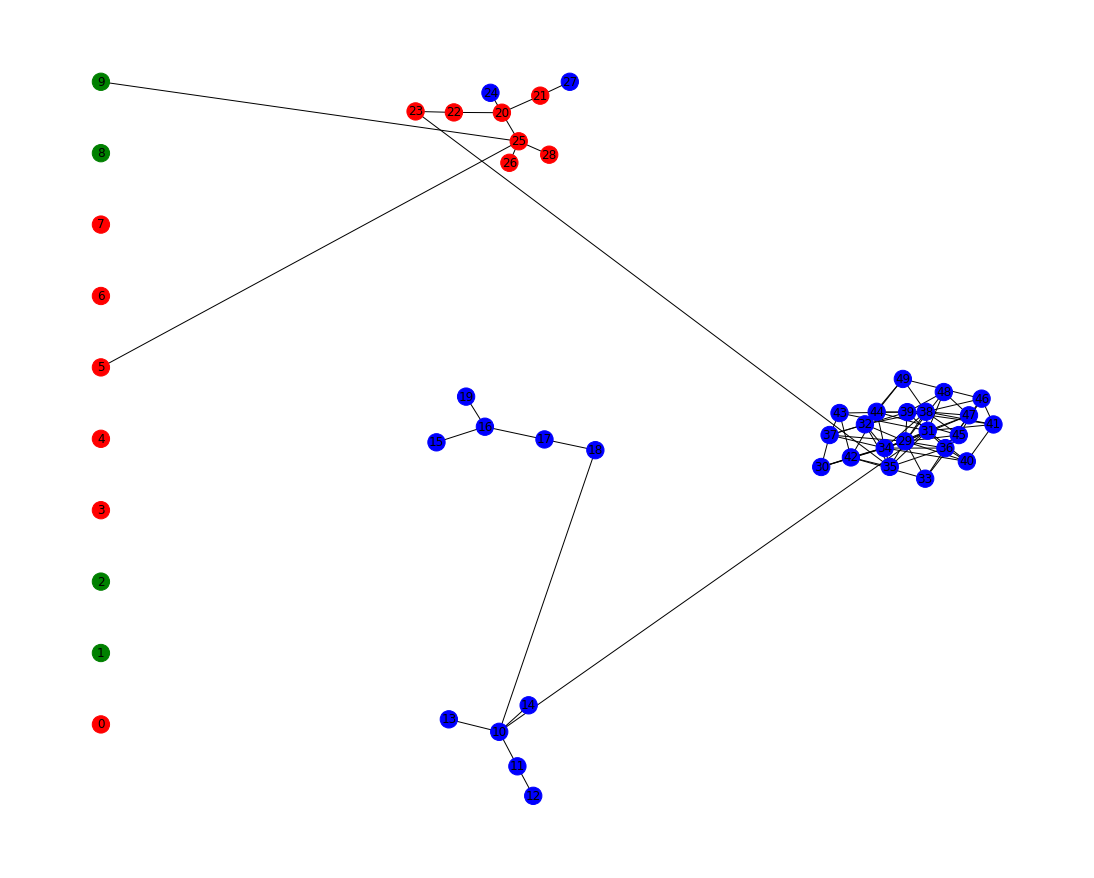

In [10]:
test_network.draw()

In [11]:
adversary.observed_changes

{}

In [12]:
test_network.users_list

[('Tamqrah', False),
 ('Ardelia', False),
 ('Carolee', False),
 ('Trenna', False),
 ('Elmira', False),
 ('Annabell', False),
 ('Ara', False),
 ('Annelise', False),
 ('Brynne', False),
 ('Claudelle', False),
 ('Evy', False),
 ('Fidela', False),
 ('Harriott', False),
 ('Cleopatra', False),
 ('Molli', False),
 ('Daveta', False),
 ('Sheelah', False),
 ('Kandace', False),
 ('Josselyn', False),
 ('Harri', False),
 ('Romy', False),
 ('Catlaina', False),
 ('Dannye', False),
 ('Zarah', False),
 ('Claresta', False),
 ('Margi', False),
 ('Dyan', False),
 ('Denise', False),
 ('Christye', False),
 ('Britt', False),
 ('Kizzie', False),
 ('Goldia', True),
 ('Darcey', False),
 ('Karlene', False),
 ('Janessa', False),
 ('Nady', False),
 ('Caroljean', False),
 ('Casandra', True),
 ('Aretha', False),
 ('Meris', False),
 ('Bernardine', False),
 ('Beryle', False),
 ('Minny', False),
 ('Carri', False),
 ('Jemie', False),
 ('Tanhya', False),
 ('Theresa', False),
 ('Sibelle', False),
 ('Joline', True),
 ('Irm

In [21]:
import random
random.randint(1,20)

19